In [1]:
import os
import wandb
import torch
from Data import *
import pandas as pd
from helper import *
import torch.nn as nn
import torch.optim as optim
from transformers import get_scheduler
from transformers import AutoTokenizer

/home/nogaschw/.conda/envs/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from Data_Embedding import *
# from BasicsModels import *
# from TaxonomyModel import *

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f5e26863510>>
Traceback (most recent call last):
  File "/home/nogaschw/.conda/envs/env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [2]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nogaschw (naji1). Use `wandb login --relogin` to force relogin


True

In [3]:
# def get_df(path):
#     df = pd.read_csv(path, sep=',')
#     print(f"finish the read {len(df)}")
#     df['prev_code'] = df['prev_code'].apply(ast.literal_eval)
#     df['prev_question'] = df['prev_question'].apply(ast.literal_eval)
#     df['score'] = df['score'].apply(ast.literal_eval)
#     print(f'Create df...')
#     return df

In [3]:
run = wandb.init(
    project="Struggling Students",
    name="Full without history",
    tags=["baseline", "falconcode_course4"],
)

In [4]:
path = "/home/nogaschw/Codeworkout/df_taxonomy_falcon4.pkl"
df_falcon = pd.read_pickle(path)

df_falcon['struggling'].value_counts()

struggling
0    30387
1     6455
Name: count, dtype: int64

In [ ]:
path = "/home/nogaschw/Codeworkout/py&javaTax.csv"
df_codeworkout = get_df(path)
df_codeworkout['struggling'].value_counts()

In [ ]:
# path = "/home/nogaschw/Codeworkout/df_taxonomy_all.csv"
# df_tax = get_df(path)
# df_tax['struggling'].value_counts()

In [5]:
text_model_name = 'distilbert/distilbert-base-uncased'
code_model_name = 'microsoft/codebert-base'

text_tokenizer = AutoTokenizer.from_pretrained(text_model_name)
code_tokenizer = AutoTokenizer.from_pretrained(code_model_name)
if text_tokenizer.pad_token is None:
    text_tokenizer.pad_token = text_tokenizer.eos_token
if code_tokenizer.pad_token is None:
    code_tokenizer.pad_token = code_tokenizer.eos_token

In [6]:
df_results = pd.DataFrame(columns=['model_name', 'threshold', 'roc_auc', 'accuracy', 'precision', 'recall', 'f1'])

In [7]:
device_name = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_name)

In [8]:
hidden_size = 128
num_layers = 2
lr = 0.00001
all_questions = 0
taxonomy = 1
balance_def = 0
mean = 0

balance_def = [same_df, oversampling_boosting, oversampling_df, undersampling_df, oversampling_augmentation][balance_def]

name = f'{["", "Mean_"][mean]}{"All_History_with"}_{["Current_Question", "All_Question", "FullyConnected"][all_questions]}_{hidden_size}_{num_layers}_{lr}_{balance_def.__name__}'

dataset = [DatasetCodeQuestion, DatasetCodeQPrevQ, DatasetLimitMean][all_questions]

# model = [CodeQuestionLSTMModel(text_model_name, code_model_name, hidden_size, num_layers),
#             CodeQPrevQLSTMModel(text_model_name, code_model_name, hidden_size, num_layers, mean=mean),
#             FullyConnectedNetwork(code_model_name, 10, 2, 1)][all_questions]
feature = None

# if taxonomy:
#     dataset = FeatureDataset
#     # feature =['If/Else', 'NestedIf', 'While', 'For', 'NestedFor', 'Math+-*/', 'Math%', 'LogicAndNotOr', 'LogicCompareNum', 'LogicBoolean', 'StringFormat', 'StringConcat', 'StringIndex', 'StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction']
#     # feature = ['LogicBoolean','StringLen', 'StringEqual', 'CharEqual', 'ArrayIndex', 'DefFunction', 'IfKnowledge', 'StringKnowledge', 'LoopsKnowledge', 'Math+-*/%', 'LogicOperators']
feature = ['IfElse', 'Loops', 'MathOperations', 'LogicOperators', 'StringOperations', 'List', 'FileOperations', 'Functions', 'Dictionary', 'Tuple']
    # model = ModelComputationalConstructs(model, hidden_size, len(feature))
name = f'Taxonomy_{["Current_Question", "All_Question"][all_questions]}_{hidden_size}_{num_layers}_{lr}_{balance_def.__name__}'

In [9]:
df = df_falcon[df_falcon['type'] != 'lab']

In [10]:
train_dataloader, valid_dataloader, test_dataloader = create_data_loader(df, DatasetCodeQuestion, text_tokenizer, code_tokenizer, batch_size=64, balanced_def=balance_def, feature=feature, ids_filepath_prefix="/home/nogaschw/Codeworkout/Thesis/Data/falcon/split_ids")

Load exist spliting


In [11]:
len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(124, 17, 36)

In [9]:
#  save_ids(set(train_dataloader.dataset.df['student_id']), (set(valid_dataloader.dataset.df['student_id'])), (set(test_dataloader.dataset.df['student_id'])), "Data/falcon/split_ids")

# See Model Results

In [15]:
path_models = "/home/nogaschw/Codeworkout/Thesis/Models"
files = os.listdir(path_models)
display(files)


['NoAll_History_with_Current_Question_128_2_1e-05_same_df.pth',
 'All_History_with_Current_Question_128_2_1e-05_same_df.pth',
 'All_History_with_Current_Question_128_2_1e-05_oversampling_df.pth',
 'lossAll_History_with_Current_Question_128_2_1e-05_oversampling_df.pth',
 'lossAll_History_with_Current_Question_128_2_1e-05_oversampling_augmentation.pth',
 'Mean_All_History_with_All_Question_128_2_1e-05_oversampling_df.pth',
 'All_History_with_Current_Question_264_2_1e-05_same_df.pth',
 'All_History_with_Current_Question_128_1_1e-05_same_df.pth',
 'Taxonomy_Current_Question_128_2_1e-05_same_df.pth',
 'All_History_with_All_Question_128_2_1e-05_same_df.pth',
 'Taxonomy_All_Question_128_2_1e-05_same_df.pth',
 'All_History_with_FullyConnected_128_2_1e-05_oversampling_augmentation.pth',
 'All_History_with_FullyConnected10_128_2_1e-05_oversampling_augmentation.pth']

In [45]:
from TaxonomyModel import *

In [55]:
model = CodeQuestionLSTMModel_Embedding(text_model_name, hidden_size, num_layers)
model = ModelComputationalConstructs_Embedding(model, hidden_size, len(feature))

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [56]:
model_path_name = os.path.join(path_models, f"{name}.pth")
print(model_path_name)
model.load_state_dict(torch.load(model_path_name))
model.to(device)

/home/nogaschw/Codeworkout/Thesis/Models/Taxonomy_Current_Question_128_2_1e-05_same_df.pth


/tmp/ipykernel_972143/3871524362.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path_name))


ModelComputationalConstructs_Embedding(
  (base_model): CodeQuestionLSTMModel_Embedding(
    (text_model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSdpaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): 

In [57]:
print(f"Allocated memory: {torch.cuda.memory_allocated() / 1024**2:.2f} MB")
print(f"Cached memory: {torch.cuda.memory_reserved() / 1024**2:.2f} MB")
print(f"Max memory allocated: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")
print(f"Max memory reserved: {torch.cuda.max_memory_reserved() / 1024**2:.2f} MB")

Allocated memory: 1786.20 MB
Cached memory: 4804.00 MB
Max memory allocated: 3036.42 MB
Max memory reserved: 4804.00 MB


In [58]:
name

'Taxonomy_Current_Question_128_2_1e-05_same_df'

In [59]:
all_labels, all_probs = eval_loop(model, valid_dataloader, device)

Batch 0 from 190


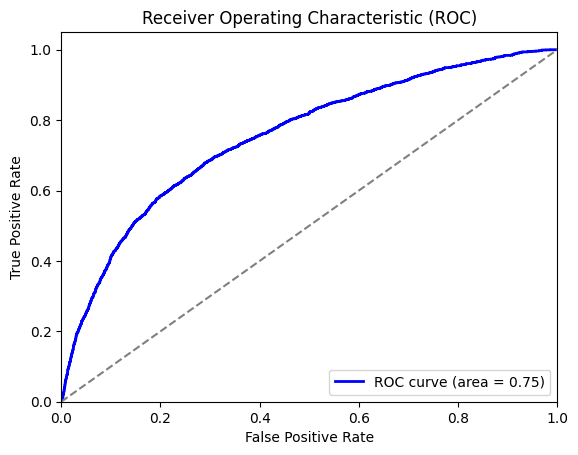

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [61]:
J = tpr - fpr
best_index = J.argmax()
best_threshold = thresholds[best_index]
print(f"The best threshold is: {best_threshold}")

The best threshold is: 0.4795159697532654


In [65]:
y_labels, y_probs = eval_loop(model, test_dataloader, device)

Batch 0 from 393


In [77]:
results(df_results, name, 0.6, y_labels, y_probs)

/sise/home/nogaschw/Codeworkout/Thesis/helper.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.DataFrame([[model_name, threshold, roc_auc, accuracy, precision, recall, f1]], columns=df.columns), df], ignore_index=True)


,model_name,threshold,roc_auc,accuracy,precision,recall,f1
0,Taxonomy_Current_Question_128_2_1e-05_same_df,0.6,0.763816,0.780567,0.438664,0.575037,0.497677


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_labels, np.round(y_probs))
cm


array([[14919,  5463],
       [ 1542,  3209]])

# Train Model

In [12]:
# Check data leak
print(set(train_dataloader.dataset.df['student_id']).intersection(set(test_dataloader.dataset.df['student_id'])))
print(set(valid_dataloader.dataset.df['student_id']).intersection(set(test_dataloader.dataset.df['student_id'])))
print(set(valid_dataloader.dataset.df['student_id']).intersection(set(train_dataloader.dataset.df['student_id'])))

set()
set()
set()


In [18]:
import importlib
import BasicsModels

# Reload the module
importlib.reload(BasicsModels)


<module 'BasicsModels' from '/sise/home/nogaschw/Codeworkout/Thesis/BasicsModels.py'>

In [13]:
from BasicsModels import *

In [14]:
model = QuestionLSTMModel(text_model_name, hidden_size, num_layers)

In [15]:
pos_weight = torch.tensor([4.0]).to(device) # Adjust this based on your class imbalance
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [16]:
model = model.to(device)

In [17]:
model = training_loop(model=model, train_dataloader=train_dataloader, test_dataloader=valid_dataloader, optimizer=optimizer, criterion=criterion, device=device, name=name)

11/09/2024_14:44:51
124 17
Epoch: 0
Batch 0 from 124
Batch 100 from 124
Test Batch 0 from 17
Epoch [1], LR: 0.000010, Loss: 1.2303, Val Loss: 1.2004, patience: 5
success deep copy
success save in /home/nogaschw/Codeworkout/Thesis/Models/Taxonomy_Current_Question_128_2_1e-05_same_df.pth
Epoch: 1
Batch 0 from 124


KeyboardInterrupt: 

In [ ]:
model = training_loop(model=model, train_dataloader=train_dataloader, test_dataloader=valid_dataloader, optimizer=optimizer, criterion=criterion, device=device, name=name)

11/09/2024_13:33:13
407 54
Epoch: 0
Batch 0 from 407
Batch 100 from 407
Batch 200 from 407
Batch 300 from 407
Batch 400 from 407
Test Batch 0 from 54
Epoch [1], LR: 0.000010, Loss: 1.0589, Val Loss: 1.0524, patience: 5


ValueError: You must pass an instance of wandb.Artifact or a valid file path to log_artifact